In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_property = pd.read_csv("./data/property_data.csv")

In [4]:
df_property
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [5]:
 df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [6]:
df_property.loc[df_property["PID"].isna(),"PID"]=100004000

In [7]:
df_property["PID"]=df_property["PID"].astype("int")

In [8]:
df_property["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [9]:
for idx, value in enumerate(df_property["OWN_OCCUPIED"]):
    try:
        int(value)
        df_property.loc[idx,"OWN_OCCUPIED"]=np.nan
    except ValueError:
            print(f"Value {value} is fine! Continue...")

Value Y is fine! Continue...
Value N is fine! Continue...
Value N is fine! Continue...
Value Y is fine! Continue...
Value Y is fine! Continue...
Value nan is fine! Continue...
Value Y is fine! Continue...
Value Y is fine! Continue...


In [10]:
for idx, value in enumerate(df_property["NUM_BEDROOMS"]):
    try:
        int(value)
        print(f"Value {value} is fine! Continue...")
    except ValueError:
        df_property.loc[idx,"NUM_BEDROOMS"]=np.nan    

Value 3 is fine! Continue...
Value 3 is fine! Continue...
Value 1 is fine! Continue...
Value 3 is fine! Continue...
Value 2 is fine! Continue...


In [11]:
for idx, value in enumerate(df_property["NUM_BATH"]):
    try:
        float(value)
        print(f"Value {value} is fine! Continue...")
    except ValueError:
        df_property.loc[idx,"NUM_BATH"]=np.nan

Value 1 is fine! Continue...
Value 1.5 is fine! Continue...
Value 1 is fine! Continue...
Value nan is fine! Continue...
Value 2 is fine! Continue...
Value 1 is fine! Continue...
Value 1 is fine! Continue...
Value 2 is fine! Continue...


In [12]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,NaN,1,NaN,700
4,100004000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800


In [15]:
!pip install xlrd

In [16]:
df_obes=pd.read_excel("./data/obes.xls",sheet_name= "7.2",skiprows=4,skipfooter=14)

In [17]:
df_obes.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [18]:
print("num of rows:",df_obes.shape[0])
print("num of cols:",df_obes.shape[1])

num of rows: 12
num of cols: 10


In [32]:
df_obes = df_obes.dropna().rename(columns={"Unnamed: 0": "Year"}).set_index("Year")

In [33]:
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


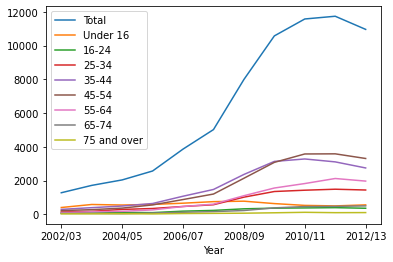

In [34]:
df_obes.plot()

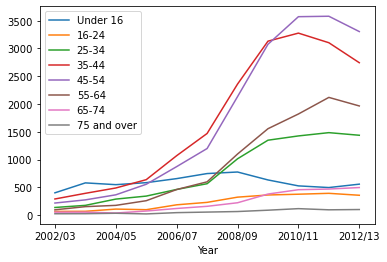

In [38]:
df_obes.drop(columns="Total").plot()

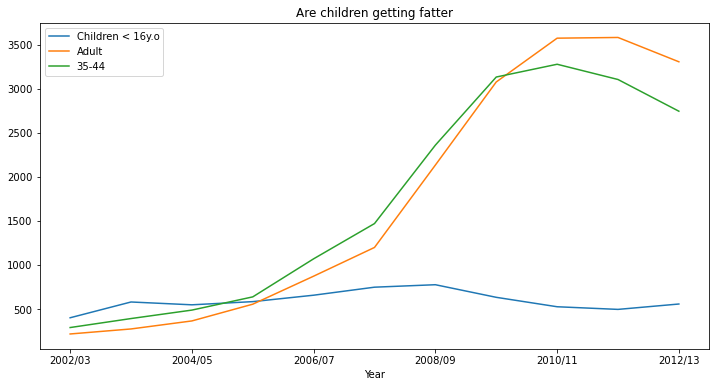

In [46]:
plt.figure(figsize= (12,6))
df_obes["Under 16"].plot(label = "Children < 16y.o", legend = True)
df_obes["45-54"].plot(label = "Adult", legend = True)
df_obes["35-44"].plot(label = "35-44", legend = True)
plt.title("Are children getting fatter")
plt.show()

In [ ]:
pd.data_range()

In [57]:
df_opsd = pd.read_csv("./data/opsd_germany_daily.csv")
print("num of rows:", df_opsd.shape[0])
print("num of cols:", df_opsd.shape[1])
display(df_opsd.head())
display(df_opsd.tail())

num of rows: 4383
num of cols: 5


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [58]:
df_opsd["Date"]= pd.to_datetime(df_opsd["Date"])

In [59]:
df_opsd = df_opsd.set_index("Date")
df_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [60]:
df_opsd["year"] = df_opsd.index.year
df_opsd["month"] = df_opsd.index.month_name()
df_opsd["dayname"]= df_opsd.index.day_name()
df_opsd

,Consumption,Wind,Solar,Wind+Solar,year,month,dayname
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,January,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,January,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,January,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,January,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,January,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,December,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,December,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,December,Friday


In [62]:
df_opsd

,Consumption,Wind,Solar,Wind+Solar,year,month,dayname
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,January,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,January,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,January,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,January,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,January,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,December,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,December,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,December,Friday


In [66]:
set_years = set(df_opsd.index.year)
set_years

{2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}

In [71]:
monthly_avg_opsd= df_opsd.groupby(["year","month"])[["Consumption","Wind","Solar"]].mean()

In [74]:
monthly_avg_opsd

Consumption        Wind       Solar
year month                                         
2006 April      1275.058900         NaN         NaN
     August     1241.188774         NaN         NaN
     December   1385.686355         NaN         NaN
     February   1467.106893         NaN         NaN
     January    1461.442065         NaN         NaN
...                     ...         ...         ...
2017 March      1422.456871  299.807516  104.216677
     May        1323.081097  182.150516  165.172774
     November   1477.990818  341.966700   27.701467
     October    1366.297385  402.583774   68.727645
     September  1335.952031  209.591000  102.643033

[144 rows x 3 columns]

In [79]:
monthly_avg_opsd.loc[
    ([2006,2007],["January","February"]),["Consumption","Wind","Solar"]]

Consumption  Wind  Solar
year month                             
2006 January   1461.442065   NaN    NaN
     February  1467.106893   NaN    NaN
2007 January   1467.058032   NaN    NaN
     February  1434.484357   NaN    NaN

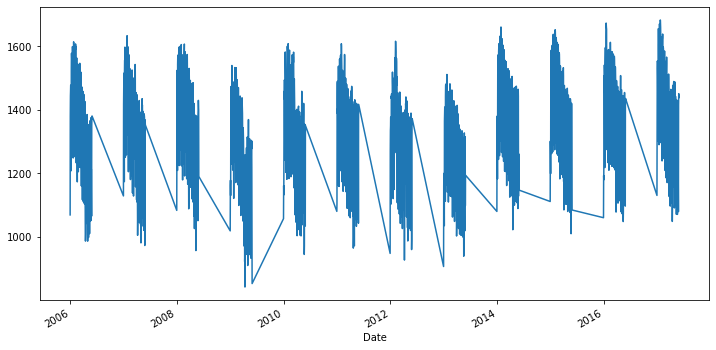

In [83]:
plt.figure(figsize=(12,6))
df_opsd.loc[df_opsd.index.month<6,"Consumption"].plot()